# Using Preprocess Data Structures and Methods

In [1]:
import os
import sys 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from detector import (
    ShapeType,
    ImageType
)
    
from detector.preprocess import (
    Vertex, Region, Image
)

2022-01-17 21:49:44.679351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 21:49:44.679393: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Exmaple 1

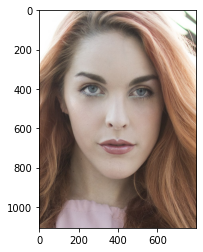

In [2]:
img = Image('../data/raw/patient/hypo_002.jpg')
img.show()

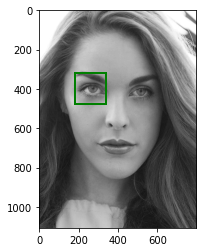

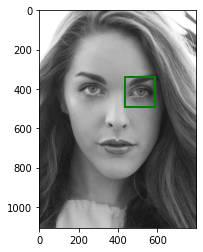

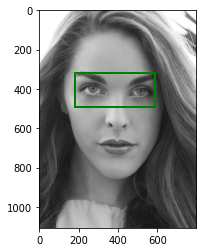

True

In [3]:
img.locate_eye_region()

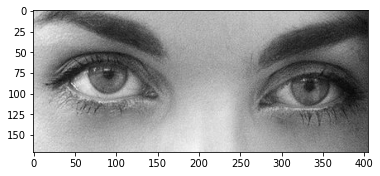

In [4]:
_type, img = img.get_eye_region()

# Example 2

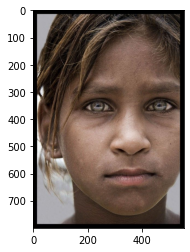

In [5]:
img = Image('../data/raw/healthy/healthy_016.jpg')
img.show()

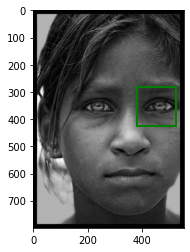

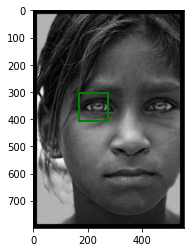

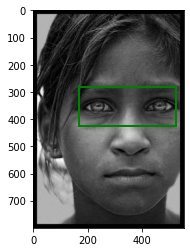

True

In [6]:
img.locate_eye_region()

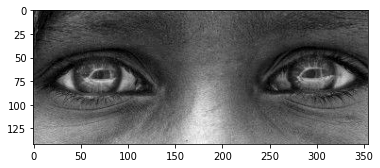

In [8]:
_type, _img = img.get_eye_region()